# SIR WITHOUT DELAY

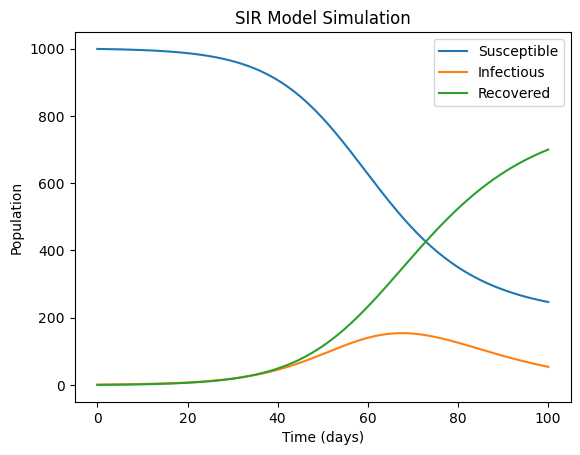

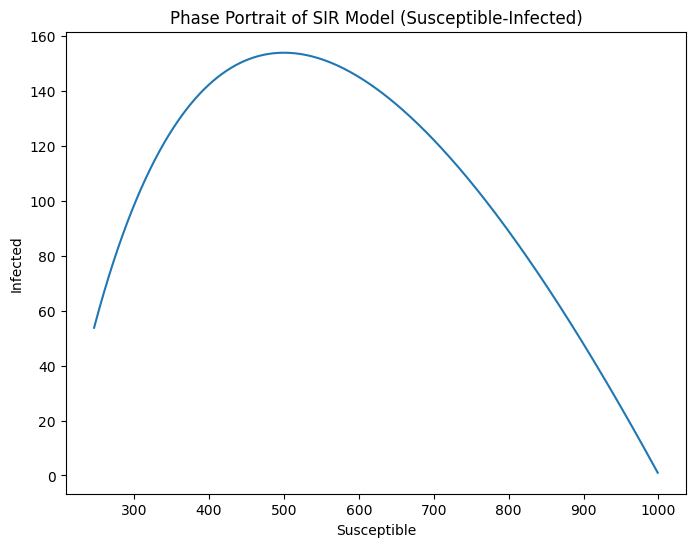

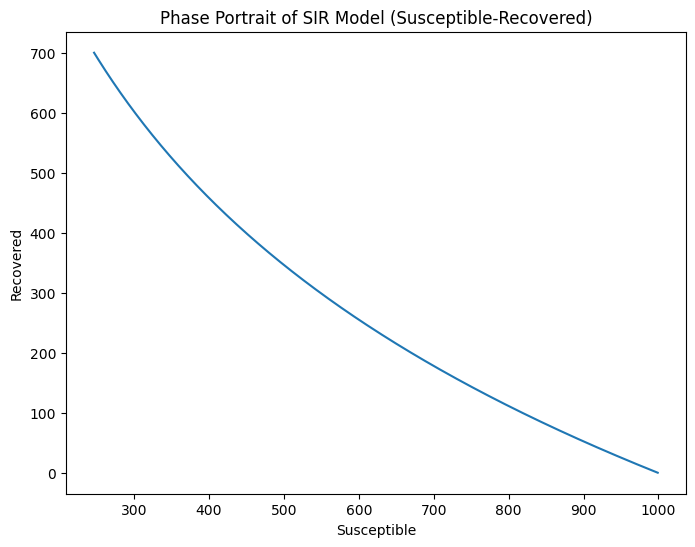

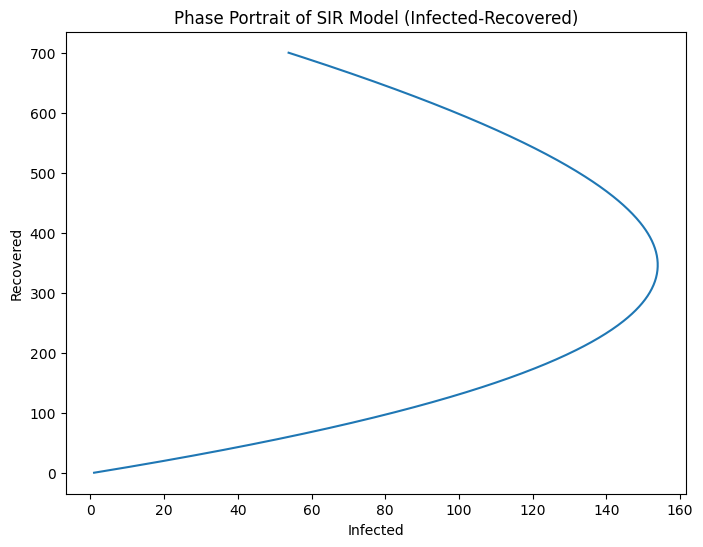

In [23]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Initial conditions
N = 1000
I0, R0 = 1, 0
S0 = N - I0 - R0
beta, gamma = 0.2, 1/10

# Differential equations
def sir_model(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Time vector (0-100 days, in 0.1 day increments)
t = np.linspace(0, 100, 1001)

# Solving SIR model
sol = odeint(sir_model, (S0, I0, R0), t, args=(N, beta, gamma))

# Results
plt.plot(t, sol[:, 0], label='Susceptible')
plt.plot(t, sol[:, 1], label='Infectious')
plt.plot(t, sol[:, 2], label='Recovered')
plt.xlabel('Time (days)')
plt.ylabel('Population')
plt.title('SIR Model Simulation')
plt.legend()
plt.show()

# Phase portrait for susceptible-infected
plt.figure(figsize=(8, 6))
plt.plot(sol[:, 0], sol[:, 1])
plt.xlabel('Susceptible')
plt.ylabel('Infected')
plt.title('Phase Portrait of SIR Model (Susceptible-Infected)')
plt.show()

# Phase portrait for susceptible-recovered
plt.figure(figsize=(8, 6))
plt.plot(sol[:, 0], sol[:, 2])
plt.xlabel('Susceptible')
plt.ylabel('Recovered')
plt.title('Phase Portrait of SIR Model (Susceptible-Recovered)')
plt.show()

# Phase portrait for infected-recovered
plt.figure(figsize=(8, 6))
plt.plot(sol[:, 1], sol[:, 2])
plt.xlabel('Infected')
plt.ylabel('Recovered')
plt.title('Phase Portrait of SIR Model (Infected-Recovered)')
plt.show()


# SIR WITH DELAY

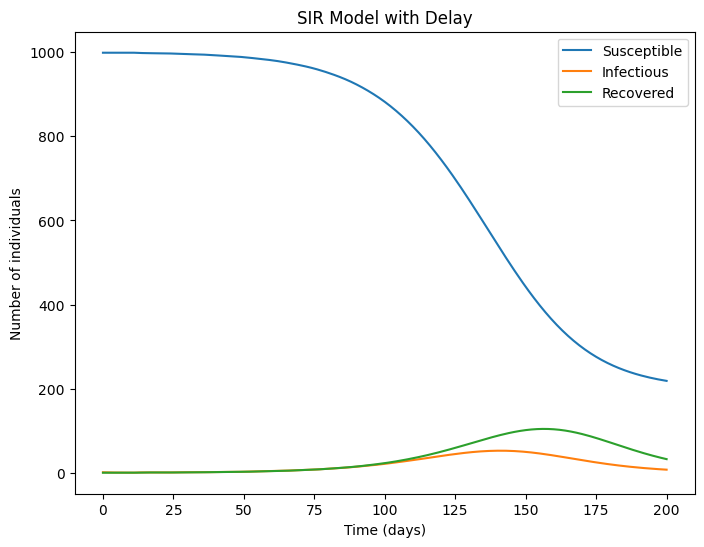

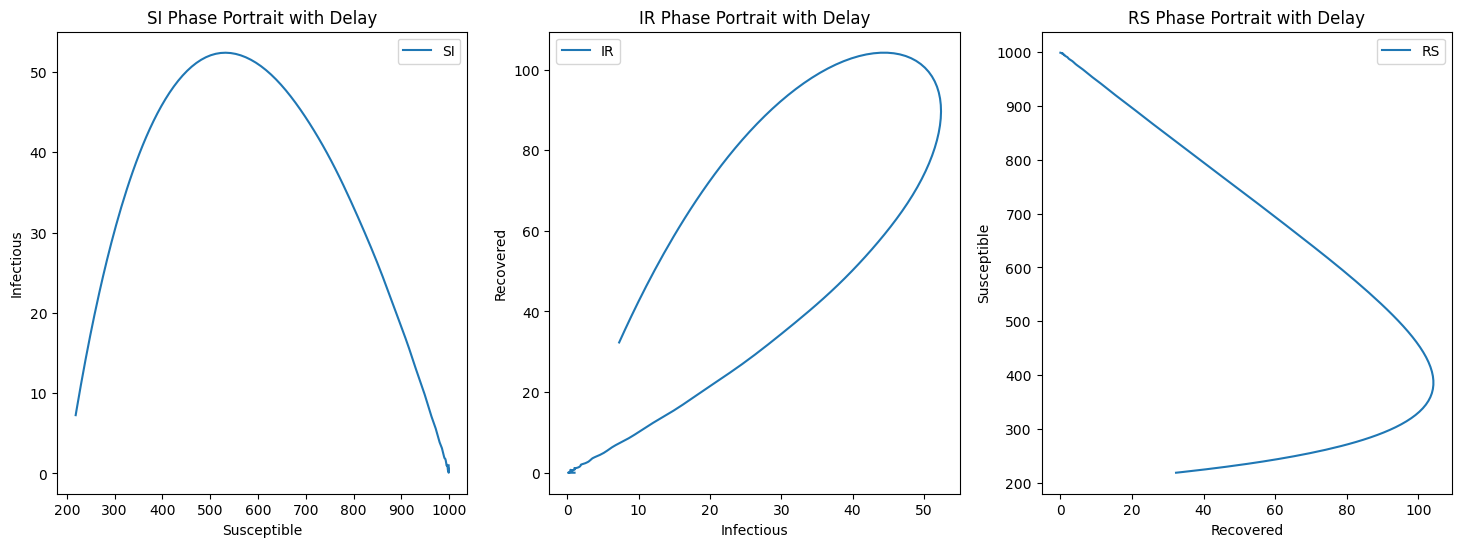

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Define the SIR model with delay
def sir_delay_model(beta, alpha, omega, N, I0, T):
    # Initial values
    S0 = N - I0
    R0 = 0

    # Time steps
    t = np.linspace(0, T, T+1)

    # Array to store solutions
    S = np.zeros(T+1)
    I = np.zeros(T+1)
    R = np.zeros(T+1)

    # Set initial values
    S[0] = S0
    I[0] = I0
    R[0] = R0

    # Delay function
    def delay_func(I, t):
        if t <= omega:
            return 0
        else:
            return I[int(t-omega)]

    # Solving the system of differential equations
    for i in range(T):
        # Derivatives computation
        dSdt = -beta * S[i] * delay_func(I, i) / N
        dIdt = beta * S[i] * delay_func(I, i) / N - alpha * I[i]
        dRdt = alpha * delay_func(I, i) - alpha * delay_func(I, i-omega)

        # Updating values
        S[i+1] = S[i] + dSdt
        I[i+1] = I[i] + dIdt
        R[i+1] = R[i] + dRdt

    return t, S, I, R

# Setting parameters
beta = 0.4
alpha = 0.2
omega = 10
N = 1000
I0 = 1
T = 200

# Solving the model
t, S, I, R = sir_delay_model(beta, alpha, omega, N, I0, T)

# Plot the results
plt.figure(figsize=(8,6))
plt.plot(t, S, label='Susceptible')
plt.plot(t, I, label='Infectious')
plt.plot(t, R, label='Recovered')
plt.xlabel('Time (days)')
plt.ylabel('Number of individuals')
plt.title('SIR Model with Delay')
plt.legend()
plt.show()

# Phase portrait for susceptible-infected
fig, axs = plt.subplots(1, 3, figsize=(18,6))
axs[0].plot(S, I, label='SI')
axs[0].set_xlabel('Susceptible')
axs[0].set_ylabel('Infectious')
axs[0].set_title('SI Phase Portrait with Delay')
axs[0].legend()
# Phase portrait for Recovered-infected
axs[1].plot(I, R, label='IR')
axs[1].set_xlabel('Infectious')
axs[1].set_ylabel('Recovered')
axs[1].set_title('IR Phase Portrait with Delay')
axs[1].legend()
# Phase portrait for Recovered-Susceptible
axs[2].plot(R, S, label='RS')
axs[2].set_xlabel('Recovered')
axs[2].set_ylabel('Susceptible')
axs[2].set_title('RS Phase Portrait with Delay')
axs[2].legend()